- This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers studying social behavior, personality prediction, or data preprocessing techniques.

 
> - Time_spent_Alone: Hours spent alone daily (0–11).  
> - Stage_fear: Presence of stage fright (Yes/No).
> - Social_event_attendance: Frequency of social events (0–10).
> - Going_outside: Frequency of going outside (0–7).
> - Drained_after_socializing: Feeling drained after socializing (Yes/No).
> - Friends_circle_size: Number of close friends (0–15).
> - Post_frequency: Social media post frequency (0–10).
> - Personality: Target variable (Extrovert/Introvert).*

In [1]:
#Install the dependencies
!pip install pandas matplotlib numpy seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
#import the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # for classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
#load the dataset and display the first rows
data = pd.read_csv(r'C:\Users\NGARE\DS_Python_Lux\Ds_projects\Extrovert Asignment\personality_datasert.csv')
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
#make a copy of the dataset

df = data.copy()
df.head(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert


In [5]:
#change columns to lower case
df.columns = df.columns.str.lower()
df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [6]:
# check the shape of the dataset. Dataset has 2900 rows and 8 columns

df.shape

(2900, 8)

In [7]:
# Getting the dataset statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_alone,2900.0,4.505816,3.441180,0.0,2.0,4.000000,7.0,11.0
social_event_attendance,2900.0,3.963354,2.872608,0.0,2.0,3.963354,6.0,10.0
going_outside,2900.0,3.000000,2.221597,0.0,1.0,3.000000,5.0,7.0
friends_circle_size,2900.0,6.268863,4.232340,0.0,3.0,5.000000,10.0,15.0
post_frequency,2900.0,3.564727,2.893587,0.0,1.0,3.000000,6.0,10.0


In [8]:
#checking for datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time_spent_alone           2900 non-null   float64
 1   stage_fear                 2900 non-null   object 
 2   social_event_attendance    2900 non-null   float64
 3   going_outside              2900 non-null   float64
 4   drained_after_socializing  2900 non-null   object 
 5   friends_circle_size        2900 non-null   float64
 6   post_frequency             2900 non-null   float64
 7   personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [9]:
#Checking for nulls

df.isnull().sum()


time_spent_alone             0
stage_fear                   0
social_event_attendance      0
going_outside                0
drained_after_socializing    0
friends_circle_size          0
post_frequency               0
personality                  0
dtype: int64

In [10]:
#check for duplicates
int(df.duplicated().sum())

402

In [11]:
# Remove the duplicates from the dataset.
# Dropping the duplicates will help reduce bias or overfitting in the model.

df = df.drop_duplicates()

In [12]:
# checking if the duplicates have been dropped
int(df.duplicated().sum())

0

In [13]:
df.head(2)
numerical_columns = ['time_spent_alone', 'social_event_attendance', 'going_outside', 'friends_circle_size',	'post_frequency']
categorical_cols = ['stage_fear','drained_after_socializing' ]
target_column = ['personality']

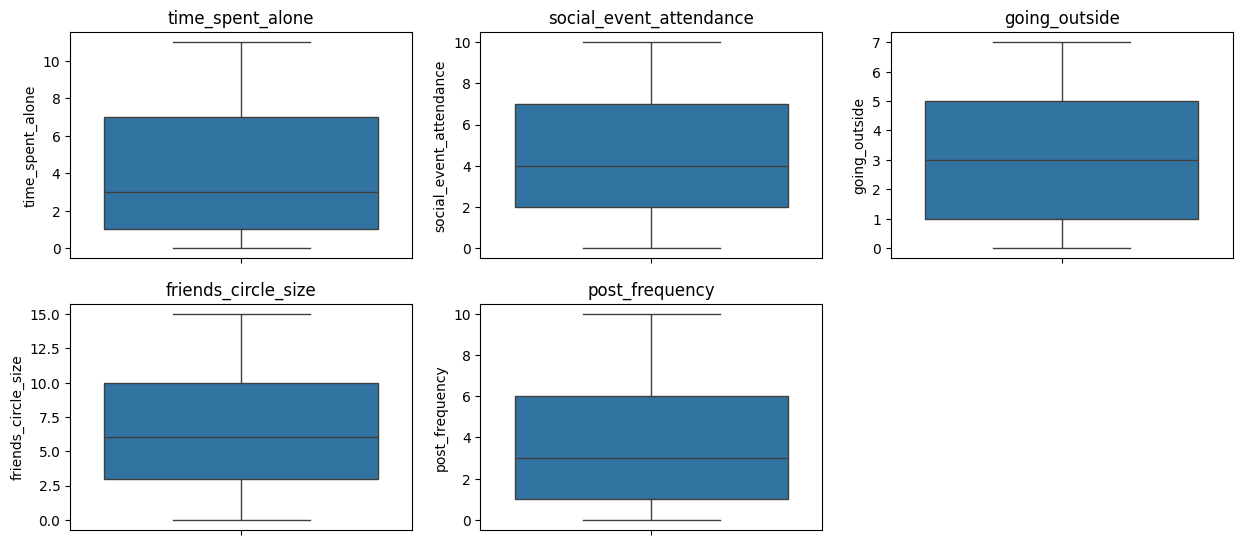

In [14]:
# Checking for outliers in our dataset
df.head(2)

plt.figure(figsize = (15,10))
for i in range(len(numerical_columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=numerical_columns[i], data = df)
    plt.title(numerical_columns[i])
plt.tight_layout
plt.show()

# The dataset has no outliers

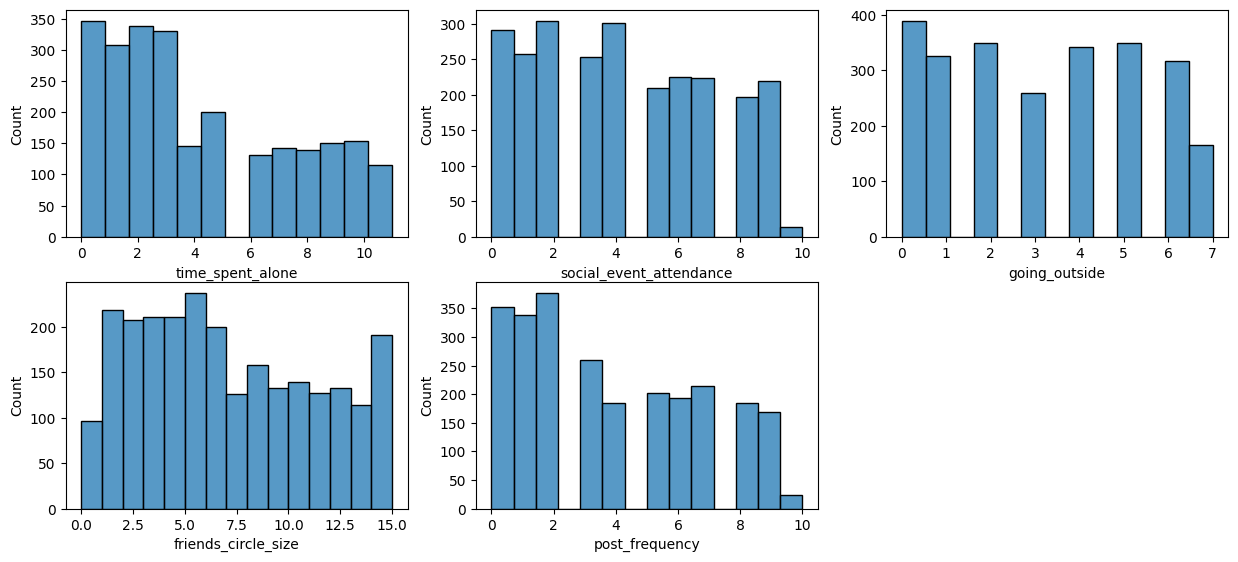

In [15]:
#Checking fo data distribution using histogram
plt.figure(figsize = (15,10))
for i in range(len(numerical_columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(x=numerical_columns[i], data = df)
    #plt.title(df.columns[i])
plt.tight_layout
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time_spent_alone           2498 non-null   float64
 1   stage_fear                 2498 non-null   object 
 2   social_event_attendance    2498 non-null   float64
 3   going_outside              2498 non-null   float64
 4   drained_after_socializing  2498 non-null   object 
 5   friends_circle_size        2498 non-null   float64
 6   post_frequency             2498 non-null   float64
 7   personality                2498 non-null   object 
dtypes: float64(5), object(3)
memory usage: 175.6+ KB


In [17]:
df.head(2)

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert


In [21]:

categorical_cols = ['stage_fear','drained_after_socializing' ]

missing_cols = [col for col in categorical_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"The following columns are missing in 'data': {missing_cols}")

OHE = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False, drop = 'first').set_output(transform = 'pandas')
encoded_o = OHE.fit_transform(df[categorical_cols])

df = df.drop(columns = categorical_cols)
df_encoded = pd.concat([df,encoded_o], axis = 1)

df_encoded.head()

,time_spent_alone,social_event_attendance,going_outside,friends_circle_size,post_frequency,personality,stage_fear_Yes,drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,Extrovert,0.0,0.0
1,9.0,0.0,0.0,0.0,3.0,Introvert,1.0,1.0
2,9.0,1.0,2.0,5.0,2.0,Introvert,1.0,1.0
3,0.0,6.0,7.0,14.0,8.0,Extrovert,0.0,0.0
4,3.0,9.0,4.0,8.0,5.0,Extrovert,0.0,0.0


In [41]:
# MAchine learning using DecisionTrees

x = df_encoded.drop(columns = 'personality')
y =df_encoded['personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'x_train: {x_train.shape}, x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')



x_train: (1998, 7), x_test: (500, 7)
y_train: (1998,), y_test: (500,)


In [46]:
d_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
d_model = d_tree.fit(x_train,y_train)

# Predict
y_pred = d_model.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\n Confusion Matrix\n {cm}')

              precision    recall  f1-score   support

   Extrovert       0.93      0.90      0.91       279
   Introvert       0.88      0.91      0.90       221

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500


 Confusion Matrix
 [[251  28]
 [ 19 202]]


              precision    recall  f1-score   support

   Extrovert       0.89      0.88      0.88       279
   Introvert       0.85      0.86      0.86       221

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500


 Confusion Matrix
 [[245  34]
 [ 30 191]]


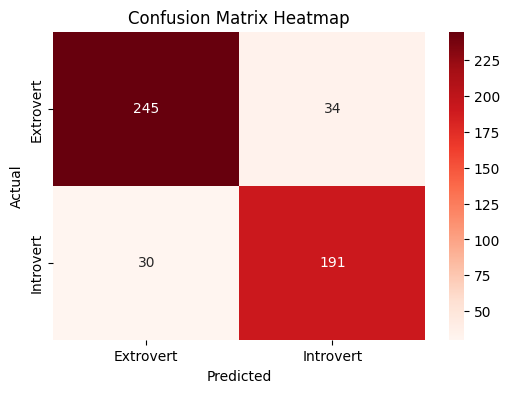

In [50]:
# Machine learning using Random Forest
r_forest = RandomForestClassifier(random_state=42)
r_forest.fit(x_train, y_train)

# Predict
y_pred = r_forest.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\n Confusion Matrix\n {cm}')

#[[TN FP]
#[FN TP]]

# Plot using sklearn built-in ConfusionMatrixDisplay
labels = ['Extrovert', 'Introvert']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

Gradient Boosting Report:
               precision    recall  f1-score   support

   Extrovert       0.93      0.90      0.91       279
   Introvert       0.88      0.92      0.90       221

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500


 Confusion Matrix
 [[250  29]
 [ 18 203]]


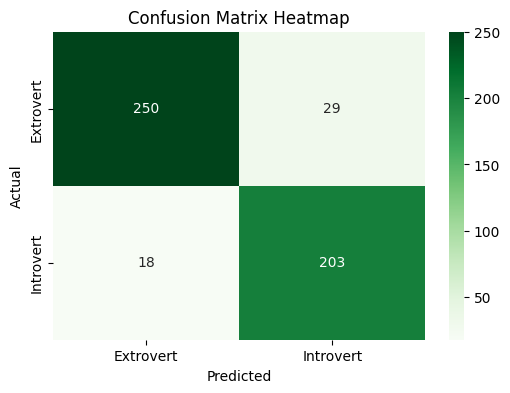

In [51]:
# Machine learning using GBC
g_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
g_boost.fit(x_train, y_train)
y_pred_gbc = g_boost.predict(x_test)
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gbc))

cm = confusion_matrix(y_test, y_pred_gbc)
print(f'\n Confusion Matrix\n {cm}')


#[[TN FP]
#[FN TP]]

# Plot using sklearn built-in ConfusionMatrixDisplay
labels = ['Extrovert', 'Introvert']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Machine learning using the XGBoost

# Initialize and train the model
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgb.fit(x_train, y_train)

# Predict
# y_pred_xgb = xgb.predict(x_test)

# Evaluation
# print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

In [53]:
# Using KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn_fit = knn.fit(x_train, y_train)
print(knn_fit)

y_knn_pred = knn_fit.predict(x_test)

#Evaluate the model
report = classification_report(y_test, y_knn_pred)
print(f'\n Classification report\n',report)

#A confusion matrix is a summary table to evaluate the performance of a classification model
#It shows how many predictions the model got right and how many it got wrong, by comparing the actual (test) labels with the predicted labels.

cm = confusion_matrix(y_test, y_knn_pred)
print(f'\n Confusion Matrix\n {cm}')


#[[TN FP]
#[FN TP]]

KNeighborsClassifier()

 Classification report
               precision    recall  f1-score   support

   Extrovert       0.93      0.90      0.91       279
   Introvert       0.88      0.91      0.90       221

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500


 Confusion Matrix
 [[251  28]
 [ 19 202]]


## Stacking Classifier  

> - Stacking combines predictions of multiple models and feeds them into a meta-model (usually simpler like Logistic Regression) to make the final prediction.

In [56]:
# Base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42))
]

# Meta-model
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train
stack_fit = stack.fit(x_train, y_train)

# Predict
y_pred_stack = stack_fit.predict(x_test)
print("Stacking Classifier Report:\n", classification_report(y_test, y_pred_stack))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)
print(f'\n Confusion Matrix\n {cm}')


#[[TN FP]
#[FN TP]]

Stacking Classifier Report:
               precision    recall  f1-score   support

   Extrovert       0.93      0.90      0.92       279
   Introvert       0.88      0.92      0.90       221

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500


 Confusion Matrix
 [[251  28]
 [ 18 203]]
